# Trying out [LUX](https://lux-api.readthedocs.io/en/latest/) - A Python API for Intelligent Visual Discovery

This notebook is launched from Anaconda Navigator.
Active virtual env = 'venv_lux'.
Packages installed: Pandas. lux-api.

In [1]:
import sys
print('Path to active virtual environment: ', sys.executable)

Path to active virtual environment:  C:\Users\Bruker\miniconda3\envs\venv_lux\python.exe


In [21]:
from math import nan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lux

In [3]:
# Set Lux as default display
# df.default_display = "lux"

In [5]:
# Debug lux widget if needed
# lux.debug_info()

In [6]:
# Install lux widget if needed
# !jupyter nbextension install --py luxwidget

In [7]:
# Enable lux widget for jupyter notebook:
!jupyter nbextension enable --py luxwidget

Enabling notebook extension luxwidget/extension...
      - Validating: ok


In [8]:
df = pd.read_csv('./data/20230711234129.csv', skiprows=5)
df['EffectiveDate'] = pd.to_datetime(df['EffectiveDate'], format='%Y-%m-%d')

In [9]:
df.shape

(5846, 35)

In [10]:
df.head(5)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [12]:
df.intent = ['PricePerUnit']
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

---

# [Export Visualizations](https://lux-api.readthedocs.io/en/latest/source/guide/export.html)

## Selecting a Single Visualization as Vis
Click on the cisualization of interest and then click the export button (looks like this 📤).
The selected visualization(s) will be stored in the list-variable `df.exported`, 
and can be accessed like this:
```
vis0 = df.exported[0]
vis1 = df.exported[1]
```

In [13]:
df.intent = ['PricePerUnit']  # Selected Transfer Type and Unit in the Enhance tab.
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [15]:
vis = df.exported[0]
vis

LuxWidget(current_vis={'config': {'view': {'continuousWidth': 300, 'continuousHeight': 300}, 'axis': {'labelCo…

In [16]:
vis_unit = df.exported[1]
vis_unit

LuxWidget(current_vis={'config': {'view': {'continuousWidth': 300, 'continuousHeight': 300}, 'axis': {'labelCo…

#### Exporting to Matplotlib

In [35]:
print(vis_unit.to_matplotlib())

import matplotlib.pyplot as plt
plt.rcParams.update(
            {
                "axes.titlesize": 20,
                "axes.titleweight": "bold",
                "axes.labelweight": "bold",
                "axes.labelsize": 16,
                "legend.fontsize": 14,
                "legend.title_fontsize": 15,
                "xtick.labelsize": 13,
                "ytick.labelsize": 13,
            }
        )
import numpy as np
from math import nan
df = pd.DataFrame({'Unit': {0: 'API Requests', 1: 'GB', 2: 'GB-Mo', 3: 'GB-month', 4: 'Gigabyte Month', 5: 'Jobs', 6: 'Objects', 7: 'Requests', 8: 'Tag-Mo'}, 'PricePerUnit': {0: 0.0, 1: 0.009310087939698493, 2: 0.01756390457643622, 3: 0.00325, 4: 0.0031322, 5: 0.25, 6: 4.53205e-07, 7: 0.29114629813148785, 8: 1.003448275862069e-06}})
fig, ax = plt.subplots()
bars = df['Unit']
measurements = df['PricePerUnit']
ax.barh(0      API Requests
1                GB
2             GB-Mo
3          GB-month
4    Gigabyte Month
5              Jobs
6  

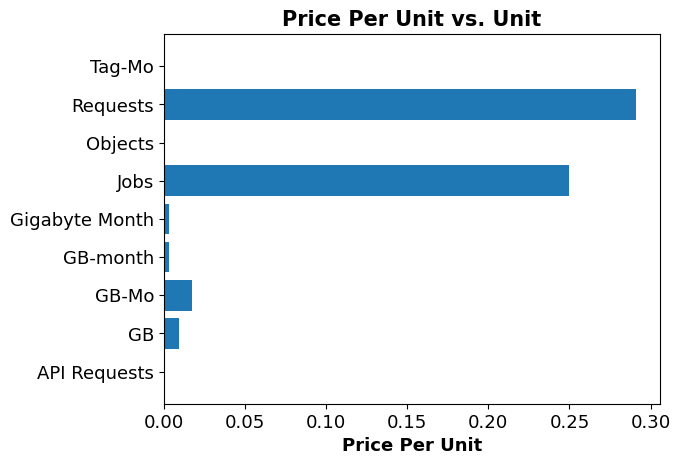

In [51]:
fig, ax = plt.subplots()

# Data
tdf = pd.DataFrame({'Unit': {0: 'API Requests', 1: 'GB', 2: 'GB-Mo', 3: 'GB-month', 4: 'Gigabyte Month', 5: 'Jobs', 6: 'Objects', 7: 'Requests', 8: 'Tag-Mo'}, 'PricePerUnit': {0: 0.0, 1: 0.009310087939698493, 2: 0.01756390457643622, 3: 0.00325, 4: 0.0031322, 5: 0.25, 6: 4.53205e-07, 7: 0.29114629813148785, 8: 1.003448275862069e-06}})
units = tdf['Unit']
y_pos = range(len(units))
price_per_unit_list = tdf['PricePerUnit']

ax.barh(y_pos, price_per_unit_list, align='center')
ax.set_yticks(y_pos, labels=transfer_types)
ax.set_xlabel('Price Per Unit')
ax.set_title('Price Per Unit vs. Unit')

plt.show()

#### Setting Vis as the Updated Intent
Often, we might be interested in other visualizations that is related to a visualization of interest and want to learn more. With the exported Vis, we can update the intent associated with dataframe to be based on the selected Vis to get more recommendations related to this visualization.

In [60]:
new_df = pd.read_csv('./data/20230711234129.csv', skiprows=5)
new_df['EffectiveDate'] = pd.to_datetime(df['EffectiveDate'], format='%Y-%m-%d')
new_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [65]:
new_df.intent = ['PricePerUnit']
new_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [67]:
new_df.save_as_html('visuals_page.html')

Saved HTML to visuals_page.html
